<a href="https://colab.research.google.com/github/JenzUwU/Gen_AI.Internship/blob/main/liinearregressionofprices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv("commodity_prices.csv")
print(data.head())

         Date  Demand_Index  Supply_Index  Global_Inflation  Commodity_Price
0  2024-01-01           120            80               3.2              150
1  2024-02-01           130            85               3.5              160
2  2024-03-01           125            90               3.1              155
3  2024-04-01           140            95               3.8              170
4  2024-05-01           135           100               3.6              165


In [12]:
X = data[['Demand_Index', 'Supply_Index', 'Global_Inflation']]
y = data['Commodity_Price']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.0
R² Score: 1.0


In [15]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print(coefficients)


            Feature   Coefficient
0      Demand_Index  1.000000e+00
1      Supply_Index -3.052333e-16
2  Global_Inflation  3.762146e-15


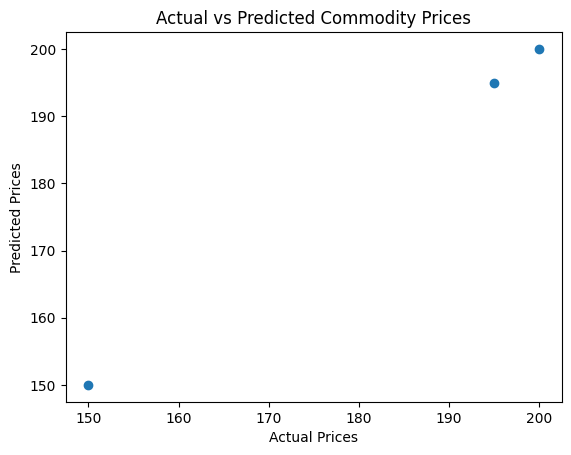

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Commodity Prices")
plt.show()

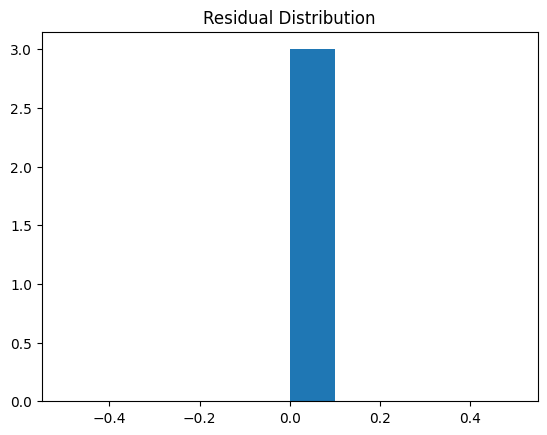

In [17]:
residuals = y_test - y_pred
plt.hist(residuals, bins=10)
plt.title("Residual Distribution")
plt.show()